# Assignment 3
## Due May 8th

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

#Creater a folder for images
path = os.path.dirname(os.path.abspath('Assignment3_bodden.ipynb')) + '\Images'
if not os.path.exists(path):
    os.makedirs(path)
np.random.seed(42)

## Exercise 4

In [20]:
def get_data(n):
        
    X = np.random.uniform(0,2, n)
    xs = np.expand_dims(X, axis=-1)
    ys = 2 * np.sin(2*X) + 0.1*np.random.normal(0, 2, n)
    ys = np.expand_dims(ys, axis=-1)
    
    return xs, ys

In [21]:
xs, ys = get_data(100)


### a)

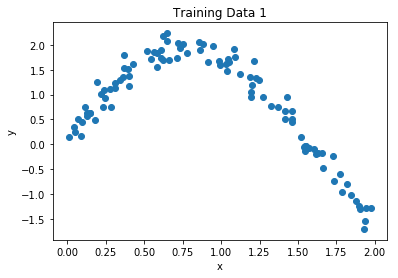

In [22]:
#Scatter-plotting of samples
plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data 1')
plt.savefig('Images/4a.png')

### b)

In [23]:
def ridge_regression(xs, ys, lam=1):
    n = len(xs)
    xs = np.matrix(xs)
    d = len(xs[0])    
    identity = np.identity(d)
    
    #print('x', xs.shape)
    #print('y', ys.shape)
    #print('id', identity.shape)   
    
    weights = np.linalg.inv((xs.T * xs + n*lam*identity)) * xs.T * ys
    
    return weights

### c)

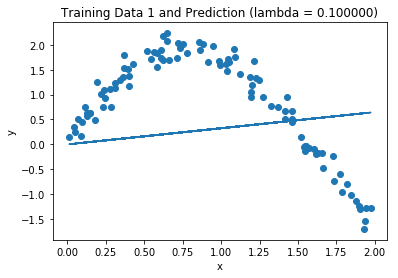

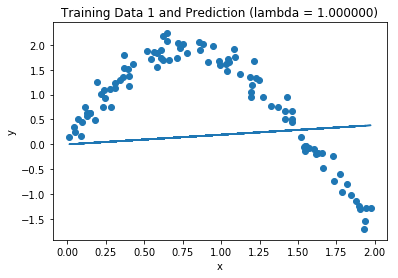

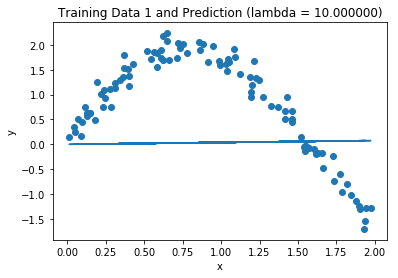

[1.515374499511039, 1.5449118191541356, 1.6347621031184643]


In [24]:
lambdas = [0.1, 1, 10]
MSE = []

for l in lambdas:
    plt.scatter(xs, ys)
    weights = ridge_regression(xs, ys, l)
    weights = weights.item()
        
    preds = weights*xs
    MSE.append(np.mean((ys-preds)**2))
    plt.plot(xs, weights*xs)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Training Data 1 and Prediction (lambda = %f)' %l)
    plt.savefig('Images/4c_%f.png' % l)
    plt.show()


print(MSE)

### d)

MSE: [0.04698594106470159, 0.04763596605954467, 0.0916223372263751, 0.6347029015516399, 1.128521197372143]
0.001


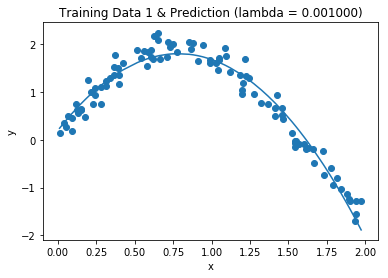

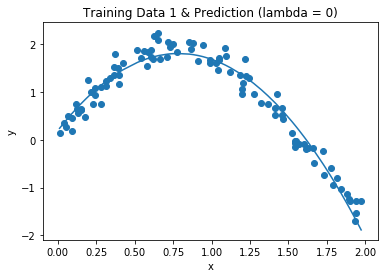

In [25]:
phi = np.hstack([np.matrix(np.ones(len(xs))).T, xs, xs**2])
lambdas = [0.001, 0.01, 0.1, 1, 10]
preds = []
MSE = []

#plt.scatter(xs, ys)
for l in lambdas:
    weights = ridge_regression(phi, ys, l)
    pred = weights[0].item()*phi[:,0] + weights[1].item()*phi[:,1] + weights[2].item()*phi[:,2]
    #print(pred.shape)
    #print(ys.shape)
    #print((np.square(ys-pred)).shape)
    preds.append(pred)
    MSE.append(np.mean(np.square(ys-pred)))
print('MSE:', MSE)
print(lambdas[np.argmin(MSE)])

#Sorting the data since the xs are not in order
plotdata = np.hstack([xs, np.asarray(preds[np.argmin(MSE)])])
plotdata = plotdata[plotdata[:,0].argsort()]

plt.scatter(xs, ys)
plt.plot(plotdata[:,0], plotdata[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data 1 & Prediction (lambda = %f)' % lambdas[np.argmin(MSE)])
plt.savefig('Images/4d_%f.png' % lambdas[np.argmin(MSE)] )
plt.show()


weights = ridge_regression(phi, ys, lam=0)
pred = weights[0].item()*phi[:,0] + weights[1].item()*phi[:,1] + weights[2].item()*phi[:,2]
 
plt.scatter(xs, ys)
plotdata = np.hstack([xs, np.asarray(pred)])
plotdata = plotdata[plotdata[:,0].argsort()]
plt.plot(plotdata[:,0], plotdata[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Data 1 & Prediction (lambda = 0)')
plt.savefig('Images/4d_0.png')


### e)

In [26]:
xs_test, ys_test = get_data(20)

Linear interpolation

MSE: 0.048620287552022794


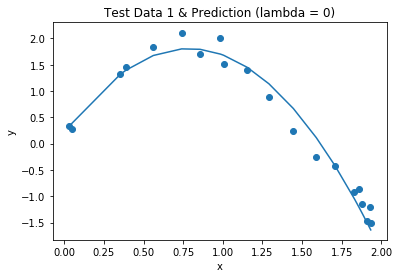

In [27]:

phi_train = np.hstack([np.matrix(np.ones(len(xs))).T, xs, xs**2])
phi_test = np.hstack([np.matrix(np.ones(len(xs_test))).T, xs_test, xs_test**2])

#Linear regression is simply ridge regression with lambda = 0
weights = ridge_regression(phi_train, ys, lam=0)
pred = weights[0].item()*phi_test[:,0] + weights[1].item()*phi_test[:,1] + weights[2].item()*phi_test[:,2]

MSE = np.mean(np.square(ys_test - pred))
 
plt.scatter(xs_test, ys_test)
plotdata = np.hstack([xs_test, np.asarray(pred)])
plotdata = plotdata[plotdata[:,0].argsort()]
plt.plot(plotdata[:,0], plotdata[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Data 1 & Prediction (lambda = 0)')
plt.savefig('Images/4d_0.png')
print('MSE:' , MSE)

Ridge interpolation

MSE:  [0.04838499424298222, 0.04689061656742961, 0.07248325608499774]
minimizing lambda: 0.01


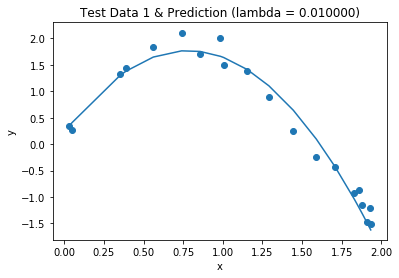

In [28]:

phi_train = np.hstack([np.matrix(np.ones(len(xs))).T, xs, xs**2]) #np.ones_like(xs)
phi_test = np.hstack([np.matrix(np.ones(len(xs_test))).T, xs_test, xs_test**2])

lambdas = [0.001, 0.01, 0.1]
preds = []
MSE = []

#plt.scatter(xs, ys)
for l in lambdas:
    weights = ridge_regression(phi_train, ys, l)
    pred = weights[0].item()*phi_test[:,0] + weights[1].item()*phi_test[:,1] + weights[2].item()*phi_test[:,2]
    preds.append(pred)
    MSE.append(np.mean(np.square(ys_test-pred)))
print('MSE: ', MSE)
print('minimizing lambda:', lambdas[np.argmin(MSE)])

plt.scatter(xs_test, ys_test)

plotdata = np.hstack([xs_test, np.asarray(preds[np.argmin(MSE)])])
plotdata = plotdata[plotdata[:,0].argsort()]
plt.plot(plotdata[:,0], plotdata[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Test Data 1 & Prediction (lambda = %f)' % lambdas[np.argmin(MSE)])
plt.show()

### f)

[12.405342545523325, 12.447777264720278, 13.030151654886453, 15.834371051169745, 17.295592772255386]
0.001


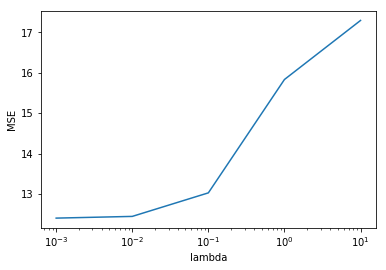

In [29]:
import pylab

xs = np.random.uniform(0,2, (100, 2))
ys = 2 * (xs[:, 0]**2) + xs[:, 1] + 1 + 0.1 * np.random.normal(0, 1, 100)
ys = np.asmatrix(ys).T

phi = np.vstack([np.ones(len(xs)), 
                xs[:, 0], 
                np.square(xs[:, 0]), 
                xs[:, 1], 
                np.square(xs[:, 1]), 
                xs[:, 0] * xs[:, 1]]).T
lambdas = [0.001, 0.01, 0.1, 1, 10]
preds = []
MSE = []

#plt.scatter(xs, ys)
for l in lambdas:
    weights = ridge_regression(phi, ys, l)
    pred = weights[0].item()*phi[:,0] + weights[1].item()*phi[:,1] + weights[2].item()*phi[:,2]+weights[3].item()*phi[:,3] + weights[4].item()*phi[:,4] + weights[5].item()*phi[:,5]
    #print(pred.shape)
    #print(ys.shape)
    #print((np.square(ys-pred)).shape)
    preds.append(pred)
    MSE.append(np.mean(np.square(ys-pred)))
print(MSE)
print(lambdas[np.argmin(MSE)])

fig = plt.figure()
ax = plt.gca()
ax.plot(lambdas, MSE)
plt.xlabel('lambda')
plt.ylabel('MSE')
ax.set_xscale('log')
plt.savefig('Images/4f.png')
